# Time Series Data -- Piecewise Aggregate Approximation and Symbolic Aggregate approXimation 

## Installation Requirements:
-  Python 2.7
-  Tkinter
-  Numpy
-  Pandas
-  Scipy
-  Matplotlib

In [1]:
# from Tkinter import *
# import ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Following methods are used to generate, normalize and apply transformations to data

In [2]:
def generateData(length):
    ts = pd.Series(np.random.randn(length), index=pd.date_range('01/01/2017', periods=length))
    ts = ts.cumsum()
    return ts

def normaliseData(ts):
    mus = ts.mean(axis=0)
    std = ts.std(axis=0)
    return (ts - mus) / std

def paaTransformData(ts, n_pieces):
    splitted = np.array_split(ts, n_pieces)
    return np.asarray(map(lambda xs: xs.mean(axis=0), splitted))

def translate(ts_values):
    return np.asarray([(alphabet[0] if ts_value < thres[0]
                        else (alphabet[-1] if ts_value > thres[-1]
                              else alphabet[np.where(thres <= ts_value)[0][-1] + 1]))
                       for ts_value in ts_values])

#### User Defines Input here (number, number, string)

In [3]:
numSplits = int(raw_input())
length = int(raw_input())
alphabet = str(raw_input())


5
50
abcd


#### Step 1 : Generate Time Series Data

In [4]:
ts_data_1 = generateData(length)
ts_data_2 = generateData(length)
ts = pd.DataFrame({"data1": ts_data_1, "data2": ts_data_2})

In [5]:
ts[0:5]

,data1,data2
2017-01-01,0.956287,-1.131184
2017-01-02,1.803722,0.409187
2017-01-03,1.846158,2.287671
2017-01-04,0.560651,1.161551
2017-01-05,1.057436,1.212189


#### Step 2 : Normalize TS data

In [6]:
zts = normaliseData(ts)

In [7]:
zts[0:5]

,data1,data2
2017-01-01,1.373588,-0.985799
2017-01-02,1.698219,-0.210476
2017-01-03,1.714475,0.735030
2017-01-04,1.222030,0.168215
2017-01-05,1.412336,0.193703


#### Step 3 : Applying Piecewise Aggregate Approximation Dimensionality Reduction

In [8]:
split = paaTransformData(zts, numSplits)
print('Outputs represented by PAA transformation :')
print split

Outputs represented by PAA transformation :
[[ 1.57607469 -0.07924509]
 [ 0.32253432  1.16699899]
 [-0.83241513  0.6335053 ]
 [-0.92035752 -0.24573351]
 [-0.14583636 -1.47552568]]


#### Step 4 : Applying Symbolic Aggregate Approximation <SAX>

In [9]:
num_alpha = len(alphabet)
thres = norm.ppf(np.linspace(1. / num_alpha, 1 - 1. / num_alpha, num_alpha - 1))
sax_transformed_data = np.apply_along_axis(translate, 0, split)
print ('Outputs represented by SAX tranformation : ')
print (sax_transformed_data)

Outputs represented by SAX tranformation : 
[['d' 'b']
 ['c' 'd']
 ['a' 'c']
 ['a' 'b']
 ['b' 'a']]


#### Step 5 : Data Visualization

In [10]:
x = pd.date_range('01/01/2017', periods=length)
start = x[0]
end = x[length - 1]
x = np.linspace(start.value, end.value, length)
x = pd.to_datetime(x)

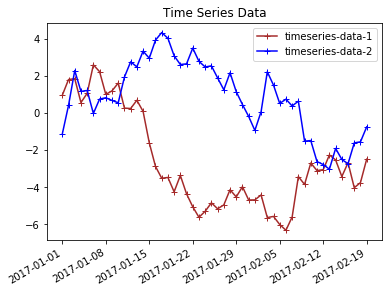

In [47]:
ts_data = plt.subplot2grid((1, 1), (0, 0), colspan=10, rowspan = 10)
ts_data.plot(x, ts_data_1, '-+', color='brown', label='timeseries-data-1')
ts_data.plot(x, ts_data_2, '-+', color='blue', label='timeseries-data-2')
plt.title('Time Series Data')
plt.setp(ts_data.get_xticklabels(), rotation=30, horizontalalignment='right')
ts_data.legend()

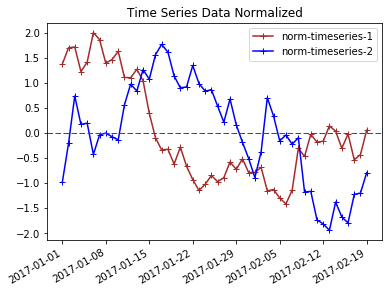

In [52]:
norm_data = plt.subplot2grid((1,1), (0,0), rowspan=10, colspan=10)
norm_data.plot(x, zts.iloc[:, 0], '-+',color='brown', label='norm-timeseries-1')
norm_data.plot(x, zts.iloc[:, 1], '-+',color='blue', label='norm-timeseries-2')
norm_data.axhline(0.0, color='green', linestyle='--', lw=1)
plt.title('Time Series Data Normalized')
plt.setp(norm_data.get_xticklabels(), rotation=30, horizontalalignment='right')
norm_data.legend()

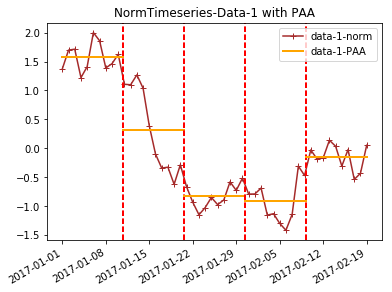

In [68]:
sl = np.linspace(start.value, end.value, numSplits+1)
sl = pd.to_datetime(sl)
paa_data_1 = plt.subplot2grid((1,1), (0,0), rowspan=10, colspan=10)
paa_data_1.plot(x, zts.iloc[:, 0], '-+', color='brown', label='data-1-norm')
for i in range(1,numSplits):
    paa_data_1.plot([sl[i-1], sl[i]], [split[i-1][0], split[i-1][0]], linewidth=2, linestyle="-", c="orange", solid_capstyle="projecting")
    paa_data_1.axvline(sl[i], color='r', linestyle='--', lw=2)
paa_data_1.plot([sl[numSplits-1], sl[numSplits]], [split[numSplits-1][0], split[numSplits-1][0]], linewidth=2, linestyle="-", c="orange",solid_capstyle="projecting",label='data-1-PAA')
paa_data_1.set_title('NormTimeseries-Data-1 with PAA')
plt.setp(paa_data_1.get_xticklabels(), rotation=30, horizontalalignment='right')
paa_data_1.legend()

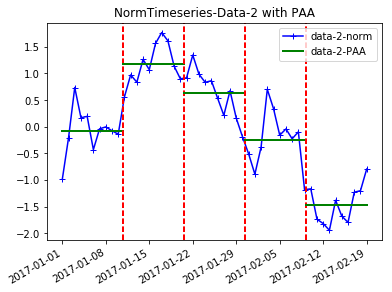

In [69]:
paa_data_2 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
paa_data_2.plot(x, zts.iloc[:, 1], '-+', color='blue', label='data-2-norm')
for i in range(1, numSplits):
    paa_data_2.plot([sl[i-1], sl[i]], [split[i-1][1], split[i-1][1]], linewidth=2, linestyle="-", c="green",solid_capstyle="projecting")
    paa_data_2.axvline(sl[i], color='r', linestyle='--', lw=2)
paa_data_2.plot([sl[numSplits-1], sl[numSplits]], [split[numSplits-1][1], split[numSplits-1][1]], linewidth=2, linestyle="-", c="green",solid_capstyle="projecting",label='data-2-PAA')
paa_data_2.set_title('NormTimeseries-Data-2 with PAA')
plt.setp(paa_data_2.get_xticklabels(), rotation=30, horizontalalignment='right')
paa_data_2.legend()

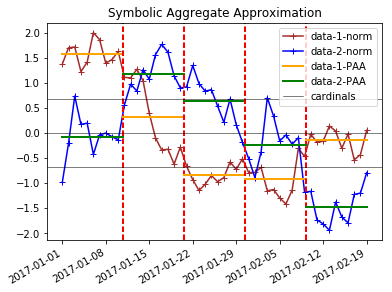

In [75]:
sax_data = plt.subplot2grid((1,1), (0,0), rowspan=10, colspan=10)
sax_data.plot(x, zts.iloc[:, 0], '-+', color='brown', label='data-1-norm')
sax_data.plot(x, zts.iloc[:, 1], '-+', color='blue', label='data-2-norm')
for i in range(1,numSplits):
    sax_data.plot([sl[i-1], sl[i]], [split[i-1][0], split[i-1][0]], linewidth=2, linestyle="-", c="orange",solid_capstyle="projecting")
    sax_data.plot([sl[i-1], sl[i]], [split[i-1][1], split[i-1][1]], linewidth=2, linestyle="-", c="green",solid_capstyle="projecting")
    sax_data.axvline(sl[i], color='r', linestyle='--', lw=2)
sax_data.plot([sl[numSplits-1], sl[numSplits]], [split[numSplits-1][0], split[numSplits-1][0]], linewidth=2, linestyle="-", c="orange",solid_capstyle="projecting",label='data-1-PAA')
sax_data.plot([sl[numSplits-1], sl[numSplits]], [split[numSplits-1][1], split[numSplits-1][1]], linewidth=2, linestyle="-", c="green",solid_capstyle="projecting",label='data-2-PAA')
for i in range(num_alpha - 2):
    sax_data.axhline(thres[i], color='black', linestyle='-', lw=0.5)
sax_data.axhline(thres[-1], color='black', linestyle='-', lw=0.5, label='cardinals')
sax_data.set_title('Symbolic Aggregate Approximation')
plt.setp(sax_data.get_xticklabels(), rotation=30, horizontalalignment='right')
sax_data.legend()

### SAX Representation --> Alphabets : ABCD (Bottom to Top)
#### Outputs From SAX Graph above:
##### Time Series Data 1 : DCAAB
##### Time Series Data 2 : BDCBA 

# Above Task With GUI can be found in Source Code
## GUI interface
### Inputs:
   ####   Length - Takes the length of randomly generated Time Series Data
   ####   Alphabets - Takes the symbols to finally represent data using SAX
   ####   Splits - Number of splits to perform PAA

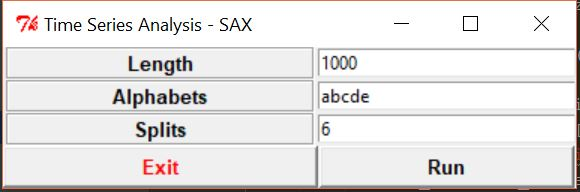

In [76]:
from IPython.display import Image
Image(filename='GUI-Interface.JPG')